In [1]:
!pip install opencv-python

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os



In [2]:
import os

file_path = "C:/Users/sweth/Desktop/sihweb/basedata/training/Non-diseased/Fuji.png"
if os.path.exists(file_path):
    print("File exists.")
else:
    print("File does not exist.")


File exists.


In [3]:
img = image.load_img("C:/Users/sweth/Desktop/sihweb/basedata/training/Non-diseased/Fuji.png")

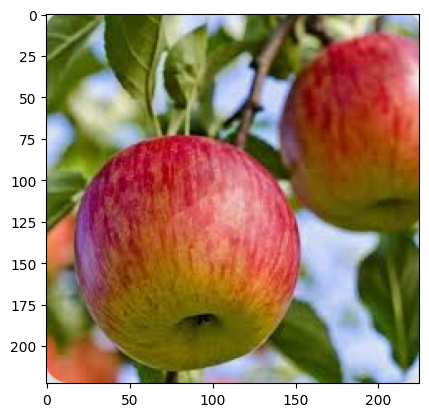

In [4]:
plt.imshow(img)

In [5]:
cv2.imread("C:/Users/sweth/Desktop/sihweb/basedata/training/Non-diseased/Fuji.png").shape
#cv2.imread("C:/Users/sweth/Desktop/sihweb/basedata/training/Non-diseased/Fuji.png")

(223, 225, 3)

In [6]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [7]:
train_dataset=train.flow_from_directory('C:/Users/sweth/Desktop/sihweb/basedata/training',
                                        target_size=(200,200),
                                        batch_size=3,
                                        class_mode='binary')

validation_dataset=train.flow_from_directory('C:/Users/sweth/Desktop/sihweb/basedata/validation',
                                        target_size=(200,200),
                                        batch_size=3,
                                        class_mode='binary')

Found 25 images belonging to 2 classes.
Found 25 images belonging to 2 classes.


In [8]:
train_dataset.class_indices

{'Non-diseased': 0, 'diseased': 1}

In [9]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1])

In [10]:
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
                                  tf.keras.layers.MaxPool2D(2,2),

                                  tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),

                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),

                                  tf.keras.layers.Flatten(),

                                  tf.keras.layers.Dense(512,activation='relu'),

                                  tf.keras.layers.Dense(1,activation='sigmoid')
                                 ])

C:\Users\sweth\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

model_fit=model.fit(train_dataset,
                    step_per_epoch=3,
                    epochs=10,
                    steps_per_epoch=100,
                    validation_data=validation_dataset)

In [12]:
import tensorflow as tf
import numpy as np

# Create dummy data
x_train = np.random.random((100, 10))
y_train = np.random.randint(2, size=(100, 1))

# Create a TensorFlow dataset from numpy arrays
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32)

# Repeat the dataset for the required number of epochs
train_dataset = train_dataset.repeat()

# Define and compile your model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
    metrics=['accuracy']
)

# Fit the model
model_fit = model.fit(
    train_dataset,
    epochs=60,
    steps_per_epoch=10  # Make sure this is appropriate for your dataset size
)


Epoch 1/60


C:\Users\sweth\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4611 - loss: 0.7031
Epoch 2/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5079 - loss: 0.6891
Epoch 3/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5015 - loss: 0.6906
Epoch 4/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5471 - loss: 0.6823
Epoch 5/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5471 - loss: 0.6834
Epoch 6/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5745 - loss: 0.6765
Epoch 7/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5744 - loss: 0.6765
Epoch 8/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5949 - loss: 0.6716
Epoch 9/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6022 - loss: 0.6704
Epoch 10/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6409 - loss: 0.6676
Epoch 11/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6104 - loss: 0.6654
Epoch 12/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6588 - loss: 0.6641


In [13]:
for i in os.listdir(dir_path):
    file_path = os.path.join(dir_path, i)
    try:
        if os.path.isfile(file_path):
            img = image.load_img(file_path)
            plt.imshow(img)
            plt.show()
        else:
            print(f"Skipped directory: {file_path}")
    except PermissionError as e:
        print(f"Permission error: {e}")
    except Exception as e:
        print(f"An error occurred: {e}")


NameError: name 'dir_path' is not defined

In [ ]:
import os
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

def process_images(dir_path):
    for root, dirs, files in os.walk(dir_path):
        for file_name in files:
            file_path = os.path.join(root, file_name)
            try:
                # Check if the file is an image (optional, based on file extension)
                if file_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                    img = image.load_img(file_path)
                    plt.imshow(img)
                    plt.title(file_name)
                    plt.axis('off')  # Hide axes for better visualization
                    plt.show()
                else:
                    print(f"Skipped non-image file: {file_path}")
            except PermissionError as e:
                print(f"Permission error: {e}")
            except Exception as e:
                print(f"An error occurred: {e}")

# Directory containing subdirectories with images
dir_path = 'C:/Users/sweth/Desktop/sihweb/basedata/testing'
process_images(dir_path)


X=image.img_to_array(img)
X=np.expand_dims(X,axis=0)
images=np.vstack([X])
val=model.predict(images)
if val==0:
    print("Diseased")
else:
    print("Non-diseased")

from tensorflow.keras.preprocessing.image import load_img, img_to_array

img = load_img('C:/Users/sweth/Desktop/sihweb/basedata/testing', target_size=(224, 224))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
predictions = model.predict(img_array)
if predictions[0] > 0.5:
    print("Diseased")
else:
    print("Non-diseased")


In [ ]:
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np

# Define the directory containing images
dir_path = 'C:/Users/sweth/Desktop/sihweb/basedata/testing'

# Iterate over files in the directory
for file_name in os.listdir(dir_path):
    file_path = os.path.join(dir_path, file_name)
    # Check if it is a file and has an image extension
    if os.path.isfile(file_path) and file_name.lower().endswith(('.png', '.jpg', '.jpeg')):
        try:
            # Load and preprocess the image
            img = load_img(file_path, target_size=(224, 224))
            img_array = img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

            # Display the image (optional)
            plt.imshow(img)
            plt.title(file_name)
            plt.axis('off')
            plt.show()

            # Here you can use img_array for prediction if needed
            # predictions = model.predict(img_array)

        except PermissionError as e:
            print(f"Permission error: {e}")
        except Exception as e:
            print(f"An error occurred: {e}")
    else:
        print(f"Skipped non-image file or directory: {file_path}")


In [ ]:
for i in os.listdir(dir_path):
    img=image.load_img(dir_path+'//'+i,target_size=(200,200))
    plt.imshow(img)
    plt.show()
    X=image.img_to_array(img)
    X=np.expand_dims(X,axis=0)
    images=np.vstack([X])
    val=model.predict(images)
    if val==0:
        print("Non-diseased")
    else:
        print("Diseased")

import os
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Load the trained model (provide the correct path to your model file)
model_path = 'C:/Users/sweth/Desktop/sihweb/basedata/testing.png'
model = tf.keras.models.load_model(model_path)

def classify_images(dir_path):
    for i in os.listdir(dir_path):
        file_path = os.path.join(dir_path, i)
        # Check if it's a file, not a directory
        if os.path.isfile(file_path):
            try:
                img = image.load_img(file_path, target_size=(200, 200))
                plt.imshow(img)
                plt.show()
                
                X = image.img_to_array(img)
                X = np.expand_dims(X, axis=0)
                images = np.vstack([X])
                
                # Predict the class
                val = model.predict(images)
                if val[0] < 0.5:  # Adjust this threshold as needed
                    print(f"{i}: Non-diseased")
                else:
                    print(f"{i}: Diseased")
            except PermissionError as e:
                print(f"Permission error: {e}")
            except Exception as e:
                print(f"An error occurred with file {file_path}: {e}")

# Directory containing images
dir_path = 'C:/Users/sweth/Desktop/sihweb/basedata/testing'
classify_images(dir_path)


In [ ]:
# Save model in .h5 format
model.save('C:/Users/sweth/Desktop/sihweb/basedata/model.h5')


In [ ]:
import os
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Load the trained model (provide the correct path to your model file)
model_path = 'C:/Users/sweth/Desktop/sihweb/basedata/testing.h5'
model = tf.keras.models.load_model(model_path)

def classify_images(dir_path):
    for i in os.listdir(dir_path):
        file_path = os.path.join(dir_path, i)
        # Check if it's a file, not a directory
        if os.path.isfile(file_path):
            try:
                img = image.load_img(file_path, target_size=(200, 200))
                plt.imshow(img)
                plt.show()
                
                X = image.img_to_array(img)
                X = np.expand_dims(X, axis=0)
                images = np.vstack([X])
                
                # Predict the class
                val = model.predict(images)
                if val[0] < 0.5:  # Adjust this threshold as needed
                    print(f"{i}: Non-diseased")
                else:
                    print(f"{i}: Diseased")
            except PermissionError as e:
                print(f"Permission error: {e}")
            except Exception as e:
                print(f"An error occurred with file {file_path}: {e}")

# Directory containing images
dir_path = 'C:/Users/sweth/Desktop/sihweb/basedata/testing'
classify_images(dir_path)


In [ ]:
import tensorflow as tf

# Load the trained model
model_path = 'C:/Users/sweth/Desktop/sihweb/basedata/testing.h5'
model = tf.keras.models.load_model(model_path)

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])  # Adjust metrics if needed


import numpy as np
import tensorflow as tf

# Load and compile the model
model_path = 'C:/Users/sweth/Desktop/sihweb/basedata/testing.h5'
model = tf.keras.models.load_model(model_path)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Dummy evaluation with random data (match the input shape to your model's input)
dummy_input = np.random.random((1, 200, 200, 3))  # Adjust dimensions if needed
dummy_output = np.array([0])  # Dummy label (0 or 1 for binary classification)

# Evaluate the model
model.evaluate(dummy_input, dummy_output)


import os
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Load the trained model
model_path = 'C:/Users/sweth/Desktop/sihweb/basedata/testing.h5'
model = tf.keras.models.load_model(model_path)

# Directory containing images
dir_path = 'C:/Users/sweth/Desktop/sihweb/basedata/testing'

def classify_images(dir_path):
    for i in os.listdir(dir_path):
        file_path = os.path.join(dir_path, i)
        if os.path.isfile(file_path):
            try:
                img = image.load_img(file_path, target_size=(200, 200))
                plt.imshow(img)
                plt.show()
                
                X = image.img_to_array(img)
                X = np.expand_dims(X, axis=0)
                images = np.vstack([X])
                
                # Predict the class
                val = model.predict(images)
                if val[0] < 0.5:  # Adjust this threshold as needed
                    print(f"{i}: Non-diseased")
                else:
                    print(f"{i}: Diseased")
            except PermissionError as e:
                print(f"Permission error: {e}")
            except Exception as e:
                print(f"An error occurred with file {file_path}: {e}")

classify_images(dir_path)


In [ ]:
import os
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Load the trained model
model_path = 'C:/Users/sweth/Desktop/sihweb/basedata/model.h5'
model = tf.keras.models.load_model(model_path)

# Directory containing images
dir_path = 'C:/Users/sweth/Desktop/sihweb/basedata/testing'

def classify_images(dir_path):
    for i in os.listdir(dir_path):
        file_path = os.path.join(dir_path, i)
        if os.path.isfile(file_path):
            try:
                img = image.load_img(file_path, target_size=(200, 200))
                plt.imshow(img)
                plt.show()
                
                X = image.img_to_array(img)
                X = np.expand_dims(X, axis=0)
                images = np.vstack([X])
                
                # Predict the class
                val = model.predict(images)
                if val[0] < 0.5:  # Adjust this threshold as needed
                    print(f"{i}: Non-diseased")
                else:
                    print(f"{i}: Diseased")
            except PermissionError as e:
                print(f"Permission error: {e}")
            except Exception as e:
                print(f"An error occurred with file {file_path}: {e}")

classify_images(dir_path)


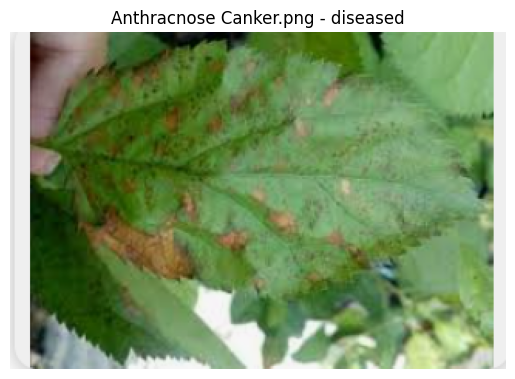

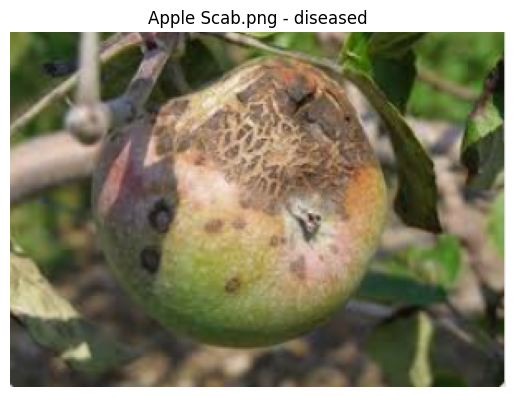

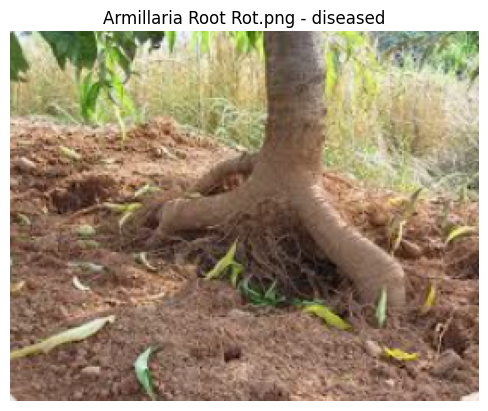

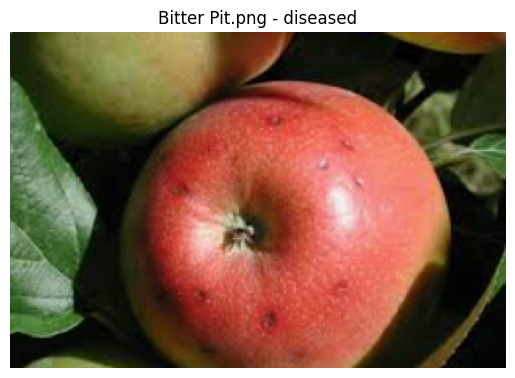

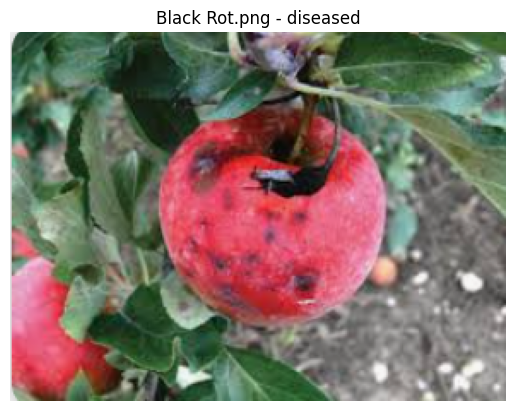

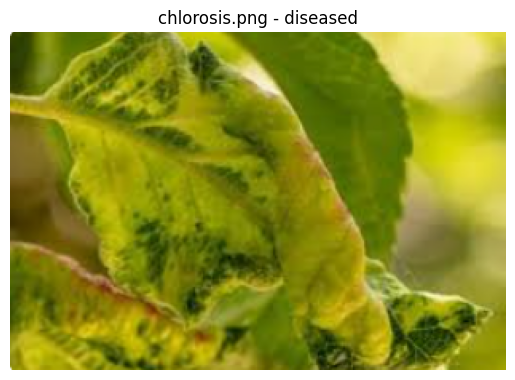

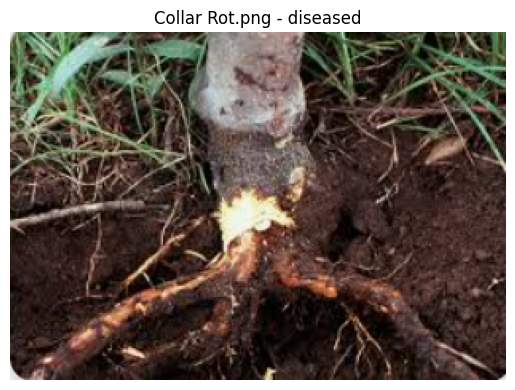

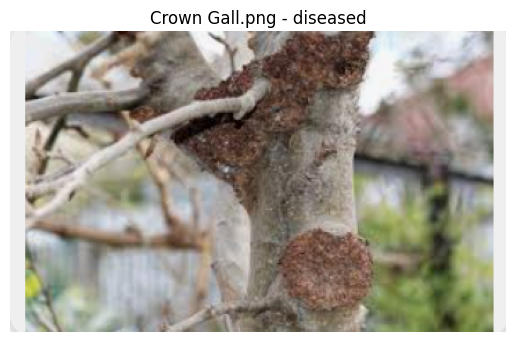

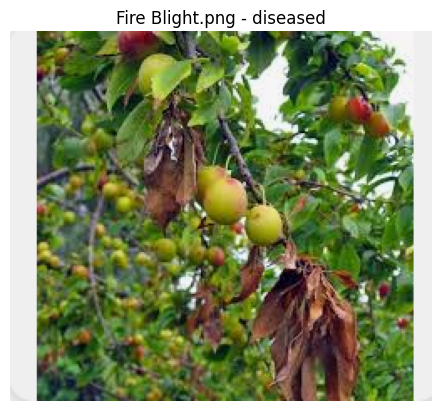

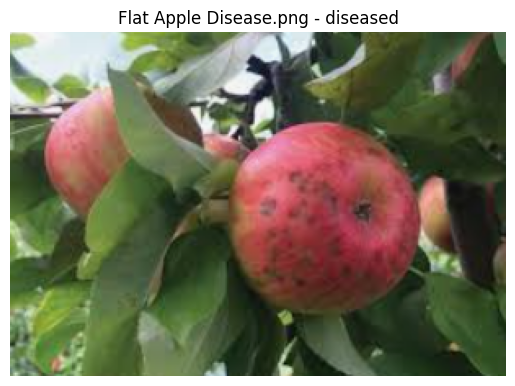

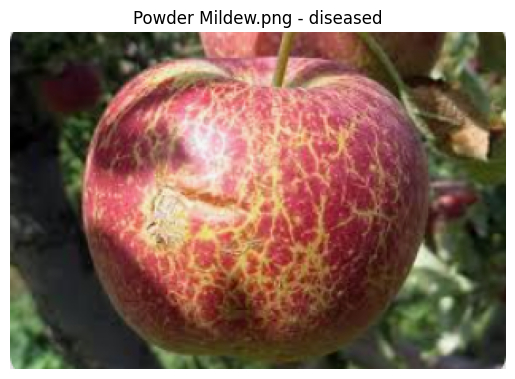

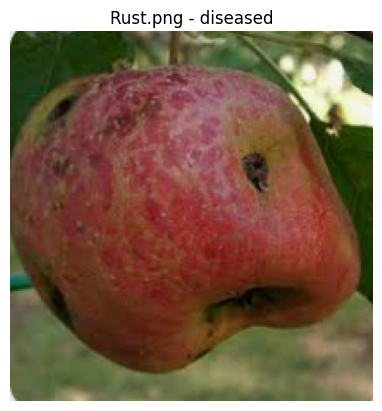

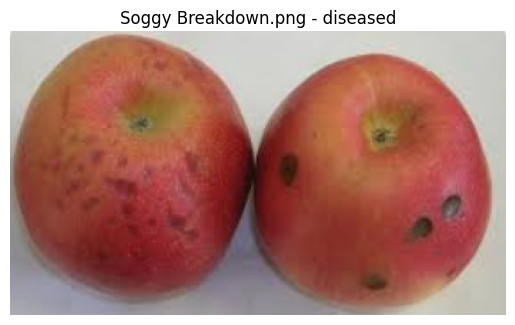

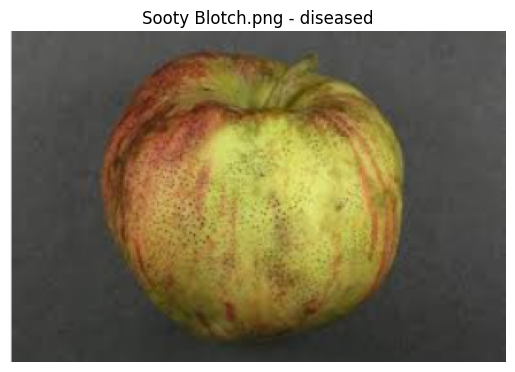

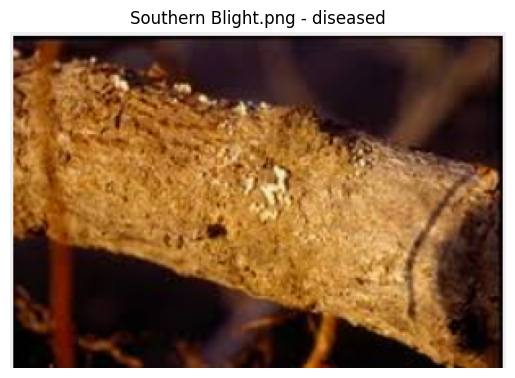

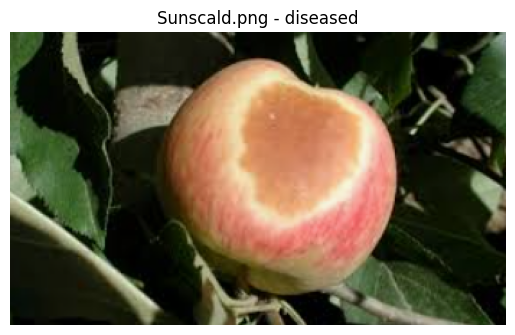

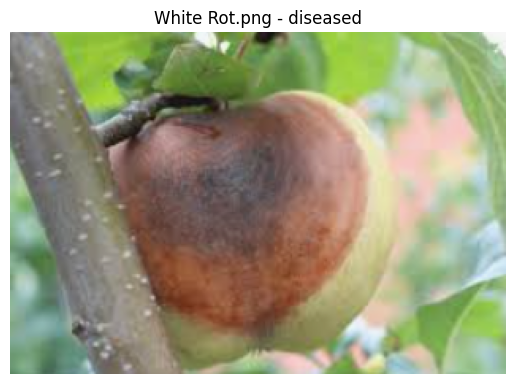

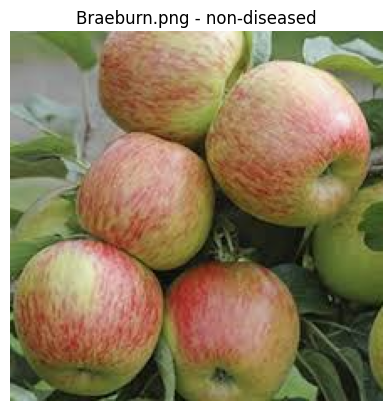

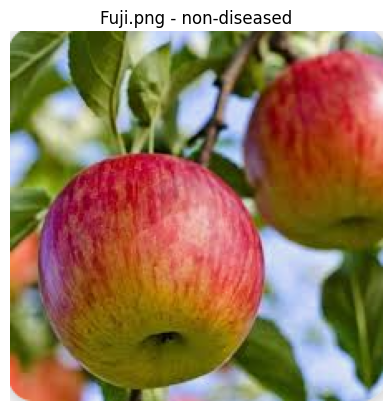

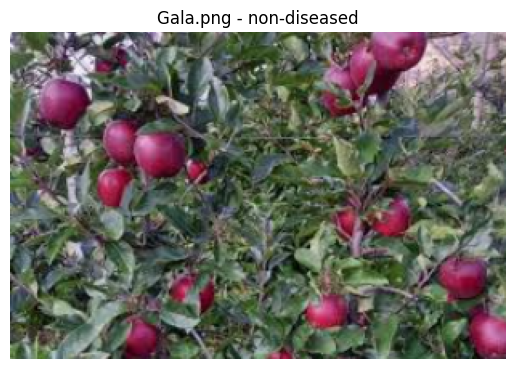

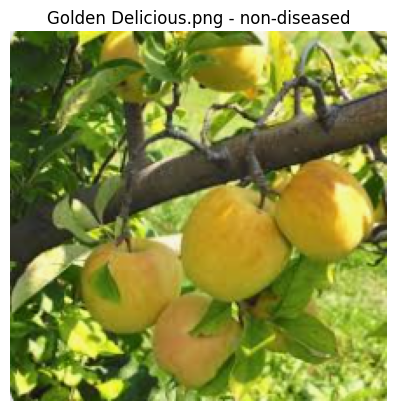

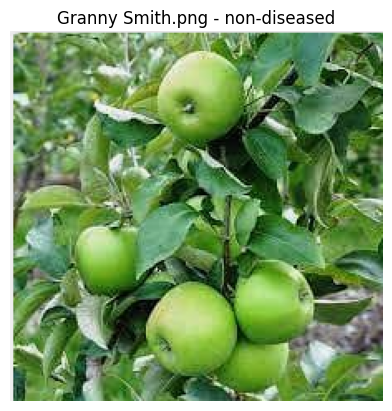

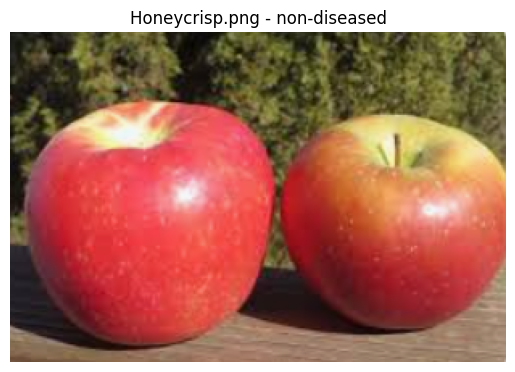

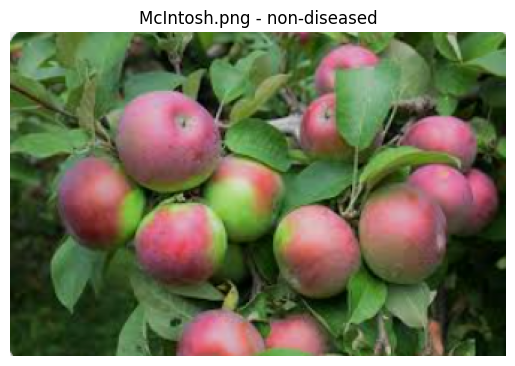

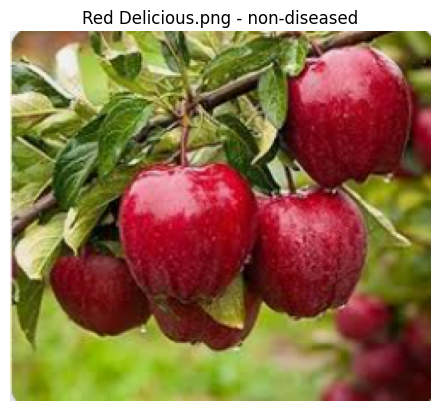

In [14]:
import os
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

def process_images(dir_path):
    for root, dirs, files in os.walk(dir_path):
        for file_name in files:
            file_path = os.path.join(root, file_name)
            try:
                # Check if the file is an image (optional, based on file extension)
                if file_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                    img = image.load_img(file_path)
                    plt.imshow(img)
                    directory_name = os.path.basename(root)  # Get the directory name
                    plt.title(f"{file_name} - {directory_name}")
                    plt.axis('off')  # Hide axes for better visualization
                    plt.show()
                else:
                    print(f"Skipped non-image file: {file_path}")
            except PermissionError as e:
                print(f"Permission error: {e}")
            except Exception as e:
                print(f"An error occurred: {e}")

# Directory containing subdirectories with images
dir_path = 'C:/Users/sweth/Desktop/sihweb/basedata/testing'
process_images(dir_path)


In [ ]:
import os
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Function to preprocess the image for model prediction
def preprocess_image(img, target_size=(224, 224)):
    img = img.resize(target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize the image
    return img_array

# Function to classify the image and return the result
def classify_image(img_array, model):
    prediction = model.predict(img_array)
    if prediction[0] > 0.5:  # Assuming a threshold of 0.5 for binary classification
        return "Diseased"
    else:
        return "Non-Diseased"

def process_images(dir_path, model):
    for root, dirs, files in os.walk(dir_path):
        for file_name in files:
            file_path = os.path.join(root, file_name)
            try:
                if file_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                    img = image.load_img(file_path)
                    img_array = preprocess_image(img)
                    result = classify_image(img_array, model)
                    
                    plt.imshow(img)
                    plt.title(f"{file_name} - {result}")
                    plt.axis('off')  # Hide axes for better visualization
                    plt.show()
                else:
                    print(f"Skipped non-image file: {file_path}")
            except PermissionError as e:
                print(f"Permission error: {e}")
            except Exception as e:
                print(f"An error occurred: {e}")

# Directory containing subdirectories with images
dir_path = 'C:/Users/sweth/Desktop/sihweb/basedata/testing'
# Assuming the model is loaded elsewhere in your code
# Pass the model as an argument to process_images
# Example usage:
# process_images(dir_path, your_model)


In [15]:
import os
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Function to preprocess the image for model prediction
def preprocess_image(img, target_size=(224, 224)):
    img = img.resize(target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize the image
    return img_array

# Function to classify the image and return the result
def classify_image(img_array, model):
    prediction = model.predict(img_array)
    return "Diseased" if prediction[0] > 0.5 else "Non-Diseased"

def process_images(dir_path, model):
    for root, dirs, files in os.walk(dir_path):
        for file_name in files:
            file_path = os.path.join(root, file_name)
            if file_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                img = image.load_img(file_path)
                img_array = preprocess_image(img)
                result = classify_image(img_array, model)
                plt.imshow(img)
                plt.title(f"{file_name} - {result}")
                plt.axis('off')  # Hide axes for better visualization
                plt.show()
            else:
                print(f"Skipped non-image file: {file_path}")

# Example usage (ensure your model is passed correctly):
# process_images('C:/Users/sweth/Desktop/sihweb/basedata/testing', your_model)


In [16]:
import os
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Preprocess the image to the required format
def preprocess_image(img, target_size=(224, 224)):
    img = img.resize(target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize the image
    return img_array

# Classify the image using the provided model
def classify_image(img_array, model):
    prediction = model.predict(img_array)
    return "Diseased" if prediction[0] > 0.5 else "Non-Diseased"

# Process images in the directory and classify them
def process_images(dir_path, model):
    for root, dirs, files in os.walk(dir_path):
        for file_name in files:
            file_path = os.path.join(root, file_name)
            if file_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                try:
                    # Load and preprocess the image
                    img = image.load_img(file_path)
                    img_array = preprocess_image(img)
                    
                    # Classify the image
                    result = classify_image(img_array, model)
                    
                    # Display the image with its classification result
                    plt.imshow(img)
                    plt.title(f"{file_name} - {result}")
                    plt.axis('off')  # Hide axes for better visualization
                    plt.show()

                except Exception as e:
                    print(f"Error processing {file_name}: {e}")
            else:
                print(f"Skipped non-image file: {file_path}")

# Example usage (ensure your model is passed correctly):
# process_images('C:/Users/sweth/Desktop/sihweb/basedata/testing', your_model)
